In [2]:
import pandas as pd

df = pd.read_excel('all_merged_data.xlsx')

#numeric_data = df.iloc[:,4:11]


   scSoA  scYFP  inYFP  scTlG  scYFP_HAC1  OE_rProt_total  OE_rProt_normalized
0  -4.20  -0.67    0.0   0.00        0.00        1.762627             1.772074
1  -1.22  -0.70    0.0   0.22        0.00        1.000000             1.000000
2   1.48   1.08    0.0   0.72        1.02        0.960393             0.955512
3   0.84   0.00    0.0  -0.28        0.00        1.564276             1.467663
4   0.57   0.36    0.0   0.00        0.00        0.757495             0.833487


In [4]:
opposite_dereg_mask = df['Gene'].isin(['C13178', 'E24277', 'B13640', 'D14872', 'C20977', 'B00660', 'C18645', 'B21582', 
                                                   'E20251', 'B13354', 'A18469', 'C16863', 'C07821'])
opposite_dereg = df[opposite_dereg_mask]
opposite_numeric = opposite_dereg.iloc[:, 4:11]
print(opposite_numeric)

    scSoA  scYFP  inYFP  scTlG  scYFP_HAC1  OE_rProt_total  \
1   -1.22  -0.70   0.00   0.22        0.00        1.000000   
3    0.84   0.00   0.00  -0.28        0.00        1.564276   
7   -2.15  -0.64   1.30   1.40        0.00        1.000000   
10   0.43   0.00   0.00  -0.24       -0.36        0.975710   
14  -0.98  -0.62   0.50   0.61        0.00        1.444437   
15  -1.15  -0.84   0.00   0.18        0.00        0.918531   
21   0.68   0.58  -0.80  -1.30        0.00        1.007515   
30  -0.81   0.00   0.00   0.47        0.00        1.172311   
41  -0.37  -0.37   0.00   0.23        0.00        0.954949   
45  -0.43   0.00   0.00   0.37        0.00        0.810140   
53  -0.41  -0.68   0.42   0.48        0.00        1.099949   
62  -0.20   0.00   0.29   0.30        0.00        1.000000   
63  -0.26  -0.28   0.00   0.38        0.00        1.079795   

    OE_rProt_normalized  
1              1.000000  
3              1.467663  
7              1.000000  
10             0.976497  
1

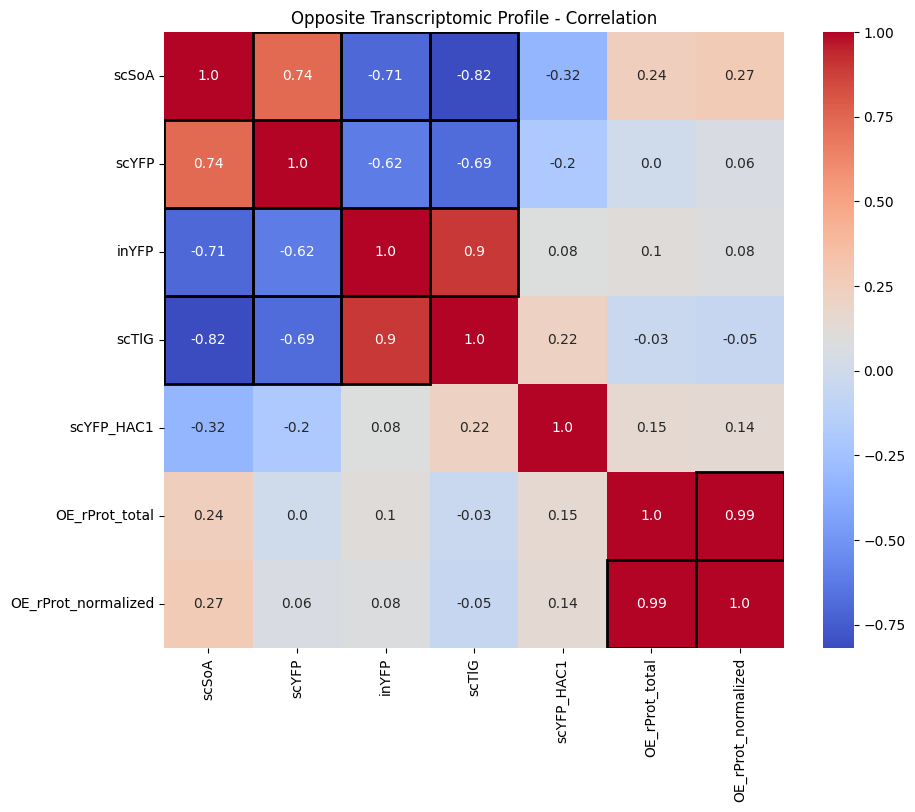

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np
import matplotlib.patches as patches


# Calculate the Pearson correlation coefficients and p-values
correlation_matrix = opposite_numeric.corr()
p_value_matrix = pd.DataFrame(np.ones(correlation_matrix.shape), columns=opposite_numeric.columns, index=opposite_numeric.columns)

for column1 in opposite_numeric.columns:
    for column2 in opposite_numeric.columns:
        if column1 != column2:
            _, p_value = pearsonr(opposite_numeric[column1], opposite_numeric[column2])
            p_value_matrix.loc[column1, column2] = p_value

# Create an annotation matrix
annot_matrix = correlation_matrix.round(2).astype(str)

# Plot the heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(correlation_matrix, annot=annot_matrix, fmt='', cmap='coolwarm', cbar=True)

# Add rectangles around significant correlations
for column1 in opposite_numeric.columns:
    for column2 in opposite_numeric.columns:
        if column1 != column2:
            if p_value_matrix.loc[column1, column2] <= 0.05:
                ax.add_patch(patches.Rectangle((opposite_numeric.columns.get_loc(column2), opposite_numeric.columns.get_loc(column1)), 
                                               1, 1, fill=False, edgecolor='black', lw=2))

plt.title('Opposite Transcriptomic Profile - Correlation')
plt.show()


In [8]:
# Uniform

uniform_dereg_mask = df['Gene'].isin(['F17468', 'B05038', 'F11011', 'C01375', 'D18678', 'E23518', 'C03564', 
                                                  'D01353', 'B12716', 'E31757', 'E30789', 'E31383', 'E19965', 'F05104', 'D06952'])
uniform_dereg = df[uniform_dereg_mask]
uniform_numeric = uniform_dereg.iloc[:, 4:11]

print(uniform_numeric)

    scSoA  scYFP  inYFP  scTlG  scYFP_HAC1  OE_rProt_total  \
2    1.48   1.08   0.00   0.72        1.02        0.960393   
8   -2.73  -2.15  -2.44  -2.79       -2.34        0.875994   
9   -0.84  -0.45   0.00  -0.26       -0.49        0.973174   
13   0.50   0.41   0.00   0.20        0.00        1.000000   
16   0.51   0.24   0.00   0.29        0.00        1.000000   
20   0.58   0.33   0.00   0.27        0.00        1.000000   
23  -0.50  -0.39   0.00  -0.28        0.00        0.928486   
25   0.42   0.23   0.00   0.25        0.00        1.000000   
26  -0.60  -0.41   0.00   0.00       -0.38        1.000000   
48   0.33   0.43   0.00   0.19        0.00        1.022595   
50   2.24   5.57   0.00   0.00        2.42        0.999525   
51  -0.31  -0.40   0.00   0.00       -0.41        0.933844   
61   0.22   0.31   0.33   0.30        0.00        0.963457   
79   0.00  -0.52  -1.05  -1.15        0.00        0.928124   
80   0.00   0.00   0.35   0.29        4.45        0.900514   

    OE_

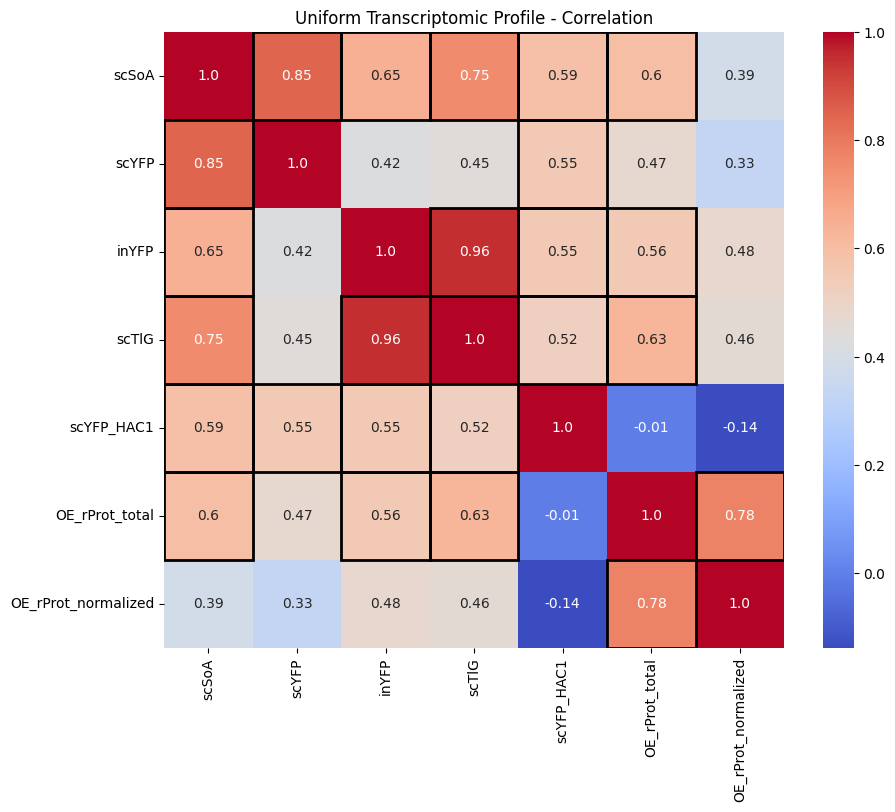

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np
import matplotlib.patches as patches


# Calculate the Pearson correlation coefficients and p-values
correlation_matrix = uniform_numeric.corr()
p_value_matrix = pd.DataFrame(np.ones(correlation_matrix.shape), columns=uniform_numeric.columns, index=uniform_numeric.columns)

for column1 in uniform_numeric.columns:
    for column2 in uniform_numeric.columns:
        if column1 != column2:
            _, p_value = pearsonr(uniform_numeric[column1], uniform_numeric[column2])
            p_value_matrix.loc[column1, column2] = p_value

# Create an annotation matrix
annot_matrix = correlation_matrix.round(2).astype(str)

# Plot the heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(correlation_matrix, annot=annot_matrix, fmt='', cmap='coolwarm', cbar=True)

# Add rectangles around significant correlations
for column1 in uniform_numeric.columns:
    for column2 in uniform_numeric.columns:
        if column1 != column2:
            if p_value_matrix.loc[column1, column2] <= 0.05:
                ax.add_patch(patches.Rectangle((uniform_numeric.columns.get_loc(column2), uniform_numeric.columns.get_loc(column1)), 
                                               1, 1, fill=False, edgecolor='black', lw=2))

plt.title('Uniform Transcriptomic Profile - Correlation')
plt.show()


In [10]:
# Nutrient

nutrient_mask = df['Gene'].isin(['E18304', 'E18304', 'E03410', 'D02783', 'E27742', 'E07942', 'E10087', 'F21923', 'C19151'])
nutrient = df[nutrient_mask]

nutrient_numeric = nutrient.iloc[:,4:11]

print(nutrient_numeric)

     scSoA  scYFP  inYFP  scTlG  scYFP_HAC1  OE_rProt_total  \
42    0.24   0.19    0.0    0.0       -0.29        1.040731   
64    0.26   0.00    0.0    0.0        0.30        1.303377   
74    0.00   0.31    0.0    0.0        0.22        0.850332   
98    0.00   0.00    0.0    0.0        0.00        0.851354   
125   0.00   0.00    0.0    0.0        0.00        0.944498   
126   0.00   0.00    0.0    0.0        0.00        0.887596   
127   0.00   0.00    0.0    0.0        0.00        1.279337   
130   0.00   0.00    0.0    0.0        0.00        0.709832   

     OE_rProt_normalized  
42              1.044388  
64              1.271940  
74              0.883215  
98              0.884211  
125             0.939457  
126             0.938357  
127             1.229632  
130             0.717100  


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


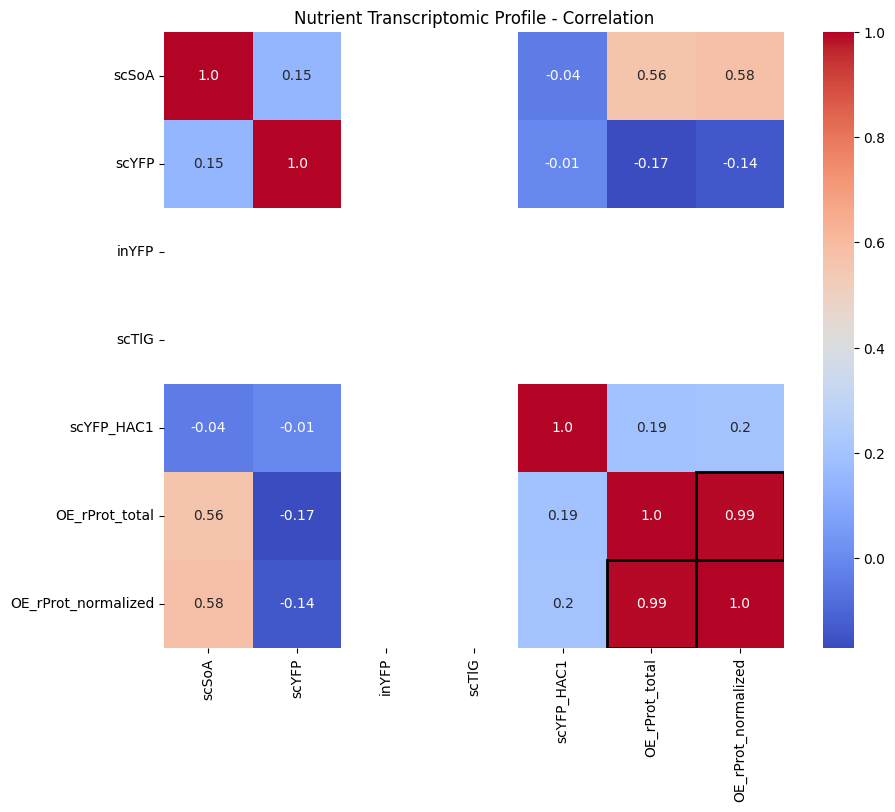

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np
import matplotlib.patches as patches


# Calculate the Pearson correlation coefficients and p-values
correlation_matrix = nutrient_numeric.corr()
p_value_matrix = pd.DataFrame(np.ones(correlation_matrix.shape), columns=nutrient_numeric.columns, index=nutrient_numeric.columns)

for column1 in nutrient_numeric.columns:
    for column2 in nutrient_numeric.columns:
        if column1 != column2:
            _, p_value = pearsonr(nutrient_numeric[column1], nutrient_numeric[column2])
            p_value_matrix.loc[column1, column2] = p_value

# Create an annotation matrix
annot_matrix = correlation_matrix.round(2).astype(str)

# Plot the heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(correlation_matrix, annot=annot_matrix, fmt='', cmap='coolwarm', cbar=True)

# Add rectangles around significant correlations
for column1 in nutrient_numeric.columns:
    for column2 in nutrient_numeric.columns:
        if column1 != column2:
            if p_value_matrix.loc[column1, column2] <= 0.05:
                ax.add_patch(patches.Rectangle((nutrient_numeric.columns.get_loc(column2), nutrient_numeric.columns.get_loc(column1)), 
                                               1, 1, fill=False, edgecolor='black', lw=2))

plt.title('Nutrient Transcriptomic Profile - Correlation')
plt.show()
